## Step Wise Process Of Implementing of KNN Algorithm & Descision Tree 

In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
pd.read_csv('E:\IRIS.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris = pd.read_csv('E:\IRIS.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Data Visualization and Analysis

In [9]:
iris.shape

(150, 5)

In [13]:
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [15]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [18]:
iris.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<AxesSubplot:>

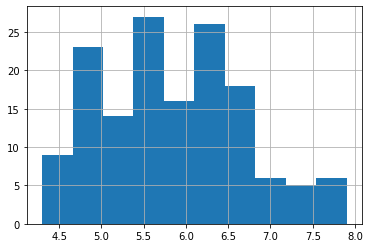

In [43]:
iris['sepal_length'].hist()

<AxesSubplot:>

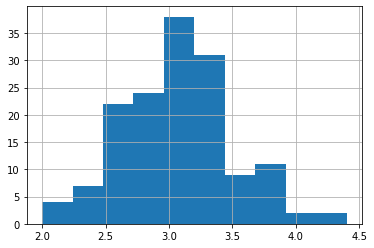

In [44]:
iris['sepal_width'].hist()

<AxesSubplot:>

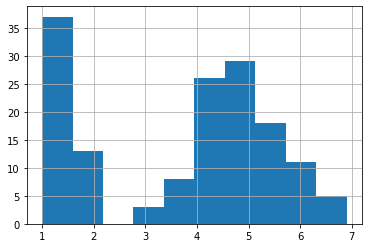

In [45]:
iris['petal_length'].hist()

<AxesSubplot:>

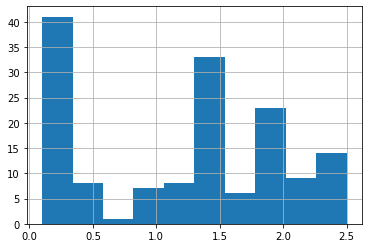

In [46]:
iris['petal_width'].hist()

In [47]:
colors = ['red' , 'orange' , 'blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']

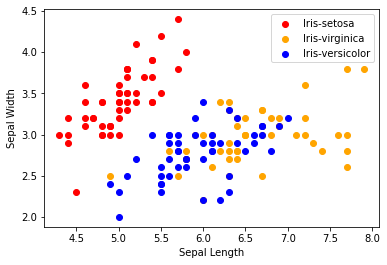

In [52]:
for i in range(3):
    x = iris[iris['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i],label = species[i] )
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

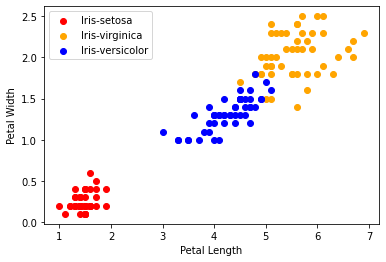

In [53]:
for i in range(3):
    x = iris[iris['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i],label = species[i] )
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

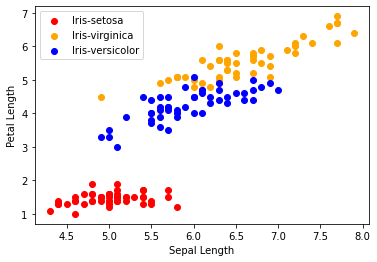

In [54]:
for i in range(3):
    x = iris[iris['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c = colors[i],label = species[i] )
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

In [55]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

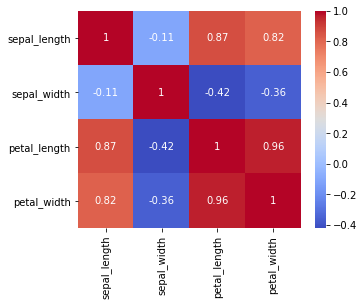

In [58]:
corr = iris.corr()
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr , annot = True , ax = ax , cmap = 'coolwarm')

### Initializing independent var as 'X' and Dependent var as 'Y'

In [19]:
X = iris.iloc[:,:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y = iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

### Data Normalization

In [24]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

### Train_Test_Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state  = 1 )
y_test.shape

(45,)

### Training and Predicting

In [28]:
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(X_train , y_train)
y_predict = knnmodel.predict(X_test)


### Accuracy

In [29]:
from sklearn.metrics import accuracy_score

In [31]:
acc = accuracy_score(y_test , y_predict)
acc

0.9777777777777777

### Confusion Metric

In [34]:
from sklearn.metrics import confusion_matrix



In [37]:
cm = confusion_matrix(y_test.values , y_predict)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [39]:
cm1 = pd.DataFrame(data = cm , index = ['setosa' ,'virginica' , 'versicolor'] , columns =['setosa' , 'virginica' , 'versicolor'])
cm1

,setosa,virginica,versicolor
setosa,14,0,0
virginica,0,18,0
versicolor,0,1,12


### Output Visualization

In [40]:
prediction_output = pd.DataFrame(data = [y_test.values , y_predict] , index = ['y_test' , 'y_predict'])

In [41]:
prediction_output.transpose()

,y_test,y_predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [42]:
prediction_output.iloc[0,:].value_counts()

Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
Name: y_test, dtype: int64

### Descision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()

In [61]:
dtmodel.fit(X_train , y_train)

DecisionTreeClassifier()

In [62]:
acc = accuracy_score(y_test , y_predict)
acc

0.9777777777777777